In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["science","nature"])
plt.rcParams.update({"font.size": 12,
                    "xtick.labelsize": 12,
                    "ytick.labelsize": 12,
                    "axes.labelsize": 12,
                    'legend.fontsize': 12})
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
c20up_inp=pd.read_csv("datas/20u_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})
c20down_inp=pd.read_csv("datas/20d_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})
c21up_inp=pd.read_csv("datas/21u_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})
c21down_inp=pd.read_csv("datas/21d_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})
c22up_inp=pd.read_csv("datas/22u_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})
c22down_inp=pd.read_csv("datas/22d_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})
c23up_inp=pd.read_csv("datas/23u_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})
c23down_inp=pd.read_csv("datas/23d_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})
c24up_inp=pd.read_csv("datas/24u_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})
c24down_inp=pd.read_csv("datas/24d_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})
c25up_inp=pd.read_csv("datas/25u_inp.csv",index_col=0).rename(columns={"R (Sunspot No.)":"R (Sunspot)","Dst-index, nT":"Dst-index"})

In [3]:
dataall=pd.concat([c20up_inp,c20down_inp,c21up_inp,c21down_inp,c22up_inp,c22down_inp,c23up_inp,c23down_inp,c24up_inp,c24down_inp,c25up_inp])

In [4]:
dataall=dataall.drop_duplicates()

In [5]:
dataall.columns

Index(['Scalar B, nT', 'SW Plasma Temperature, K', 'SW Proton Density, N/cm^3',
       'SW Plasma Speed, km/s', 'Alpha/Prot. ratio', 'Flow pressure',
       'Kp index', 'R (Sunspot)', 'Dst-index', 'f10.7_index'],
      dtype='object')

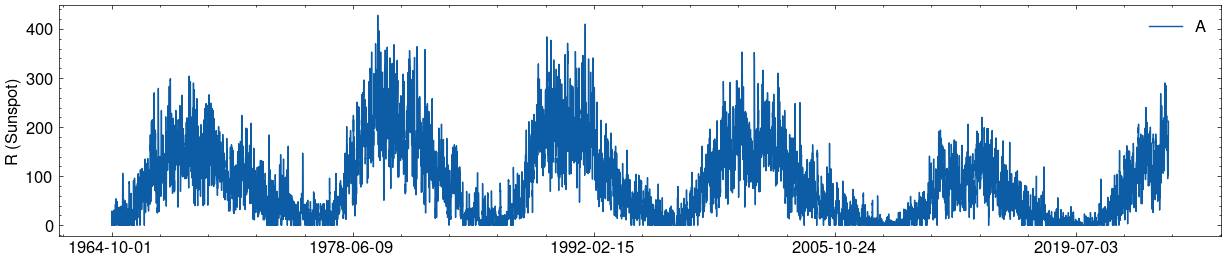

In [6]:
dataall["R (Sunspot)"].plot(figsize=(15,3),label="A")
plt.ylabel("R (Sunspot)");plt.legend()
plt.show()

In [7]:
from scipy.stats import entropy
from scipy.signal import welch
import antropy as ant
import nolds
import hfda

def compute_entropies_and_fractal_dimensions(ts, sampling_rate=1.0):
    """
    Computes several entropy measures and fractal dimensions for a given time series.
    
    Parameters:
    - ts: array-like, the time series.
    - sampling_rate: float, the sampling frequency (needed for spectral entropy).

    Returns:
    - A dictionary with all computed measures.
    """
    # Entropy Measures
    shannon_entropy = entropy(np.histogram(ts, bins='auto', density=True)[0])
    sample_entropy = ant.sample_entropy(ts)
    permutation_entropy = ant.perm_entropy(ts, normalize=True)
    spectral_entropy = ant.spectral_entropy(ts, sf=sampling_rate, method='welch', normalize=True)
    app_entropy = ant.app_entropy(ts)
    k_max=5
    # Fractal Dimensions
    higuchi_fd = ant.higuchi_fd(ts)
    #higuchi_fd = hfda.measure(ts,k_max)
    katz_fd = ant.katz_fd(ts)
    petrosian_fd = ant.petrosian_fd(ts)
    lepel_ziv = ant.lziv_complexity(np.array(ts))
    dfa = ant.detrended_fluctuation(ts)
    return {
        "Shannon Entropy": shannon_entropy,
        "Sample Entropy": sample_entropy,
        "Permutation Entropy": permutation_entropy,
        "Spectral Entropy": spectral_entropy,
        "Approximate Entropy": app_entropy,
        "Higuchi Fractal Dimension": higuchi_fd,
        "Katz Fractal Dimension": katz_fd,
        "Petrosian Fractal Dimension": petrosian_fd,
        "Lempel-Ziv complexity": lepel_ziv,
        "Hurts exponent":dfa
    }

In [8]:
compute_entropies_and_fractal_dimensions(dataall["R (Sunspot)"])

{'Shannon Entropy': np.float64(3.3169250215075388),
 'Sample Entropy': np.float64(0.3763724230177847),
 'Permutation Entropy': np.float64(0.8996961353099202),
 'Spectral Entropy': np.float64(0.6836993447377726),
 'Approximate Entropy': np.float64(0.685677369367315),
 'Higuchi Fractal Dimension': 1.440846118066005,
 'Katz Fractal Dimension': np.float64(2.7753991860993557),
 'Petrosian Fractal Dimension': np.float64(1.014556052558608),
 'Lempel-Ziv complexity': 7913,
 'Hurts exponent': 1.0728405177453668}

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import antropy as ant
from tqdm.auto import tqdm   # auto picks Jupyter/terminal style automatically

# ---------- helpers (unchanged) ----------
def shannon(win):
    hist, _ = np.histogram(win, bins="auto", density=True)
    return entropy(hist)

def sampen(win):   return ant.sample_entropy(win)
def permen(win):   return ant.perm_entropy(win, normalize=True)
def specen(win, sf): return ant.spectral_entropy(win, sf=sf, method="welch", normalize=True)
def appen(win):    return ant.app_entropy(win)
def higuchi(win):  return ant.higuchi_fd(win)
def katz(win):     return ant.katz_fd(win)
def petro(win):    return ant.petrosian_fd(win)
def lz(win):       return ant.lziv_complexity(np.asarray(win))
def hurst(win):    return ant.detrended_fluctuation(win)

# ---------- wrapper with centred window *and* tqdm progress bar ----------
def sliding_window_features(ts, window, sampling_rate=1.0):
    """
    Returns a DataFrame with ten entropy / fractal-dimension measures plus the
    original signal, calculated in a centred sliding window.  A tqdm bar shows
    progress and estimated time remaining while each metric is processed.
    """
    s = pd.Series(ts, name="Original").astype(float)
    roll = s.rolling(window=window, min_periods=window//2+1, center=True)

    funcs = {
        "Shannon Entropy"        : shannon,
        "Sample Entropy"         : sampen,
        "Permutation Entropy"    : permen,
        "Spectral Entropy"       : lambda x: specen(x, sampling_rate),
        "Approximate Entropy"    : appen,
        "Higuchi Fractal Dim."   : higuchi,
        "Katz Fractal Dim."      : katz,
        "Petrosian Fractal Dim." : petro,
        "Lempel-Ziv Complexity"  : lz,
        "Hurst Exponent"         : hurst
    }

    cols = []
    with tqdm(total=len(funcs), desc="Sliding-window metrics", unit="metric") as bar:
        for name, fn in funcs.items():
            bar.set_postfix(metric=name)          # shows current metric name
            cols.append(roll.apply(fn, raw=False).rename(name))
            bar.update(1)

    df = pd.concat(cols, axis=1)
    df[ts.name] = s
    return df

In [10]:
features_df_R = sliding_window_features(dataall["R (Sunspot)"], window=100, sampling_rate=1.0)

Sliding-window metrics: 100%|██████████| 10/10 [01:21<00:00,  8.15s/metric, metric=Hurst Exponent]       


In [11]:
features_df_F10 = sliding_window_features(dataall["f10.7_index"], window=100, sampling_rate=1.0)

Sliding-window metrics: 100%|██████████| 10/10 [01:21<00:00,  8.16s/metric, metric=Hurst Exponent]       


In [12]:
features_df_Dst = sliding_window_features(dataall["Dst-index"], window=100, sampling_rate=1.0)

Sliding-window metrics: 100%|██████████| 10/10 [01:09<00:00,  6.92s/metric, metric=Hurst Exponent]       


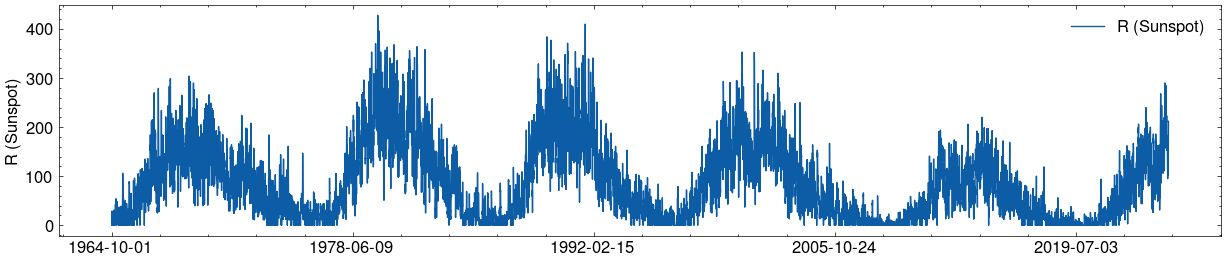

In [13]:
features_df_R["R (Sunspot)"].plot(figsize=(15,3),label="R (Sunspot)")
plt.ylabel("R (Sunspot)");plt.legend()
plt.show()

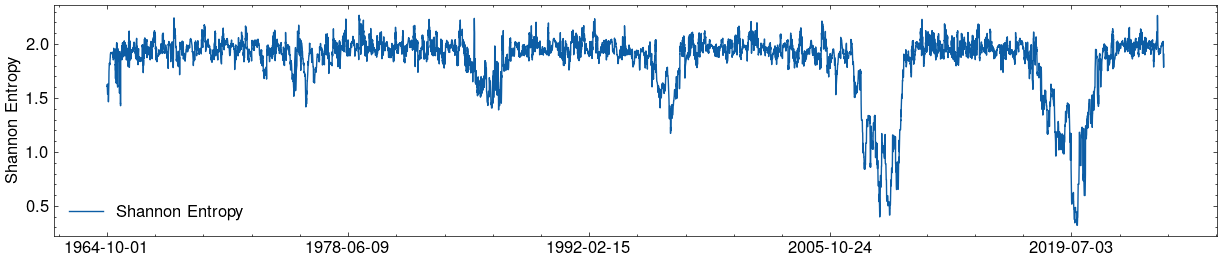

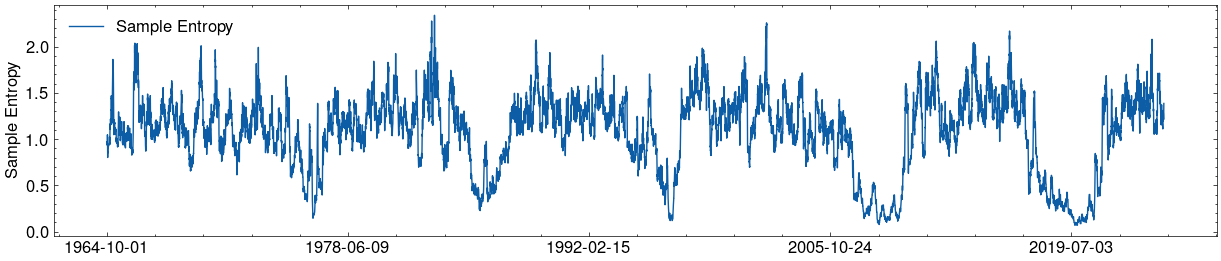

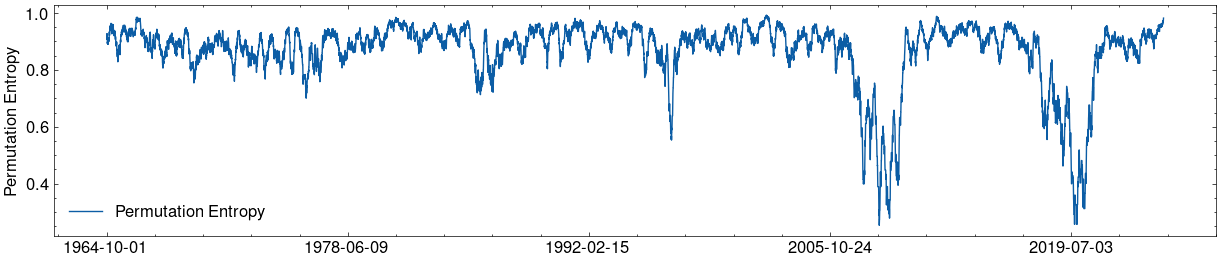

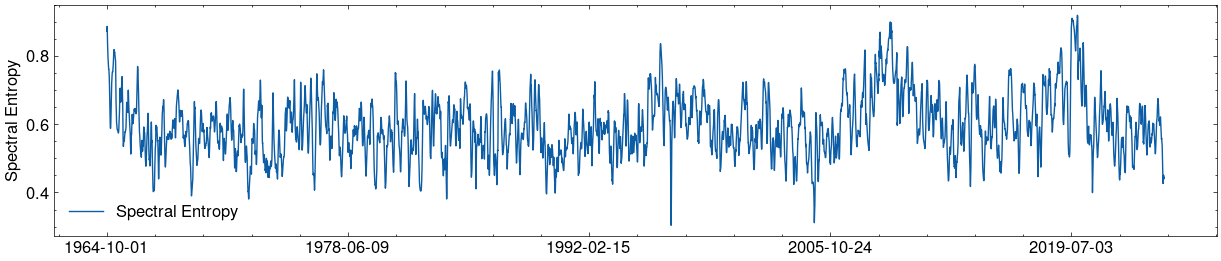

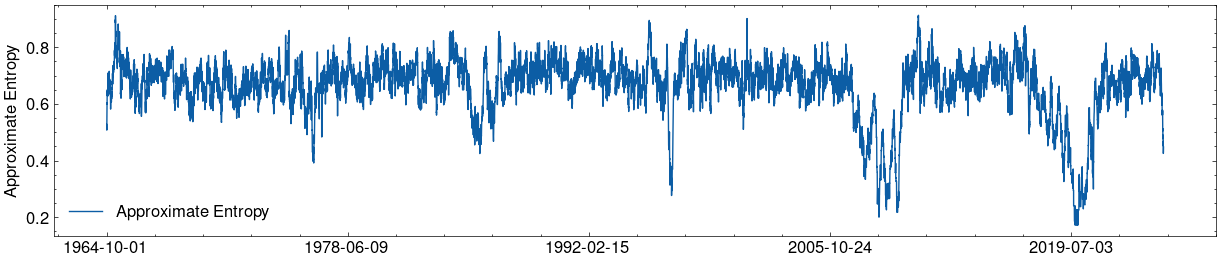

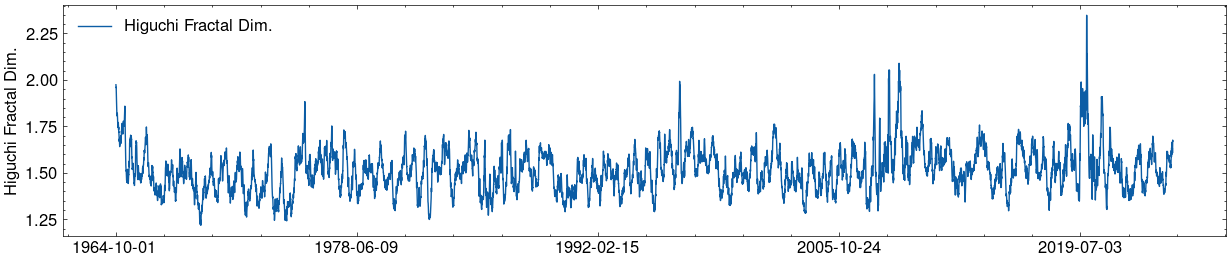

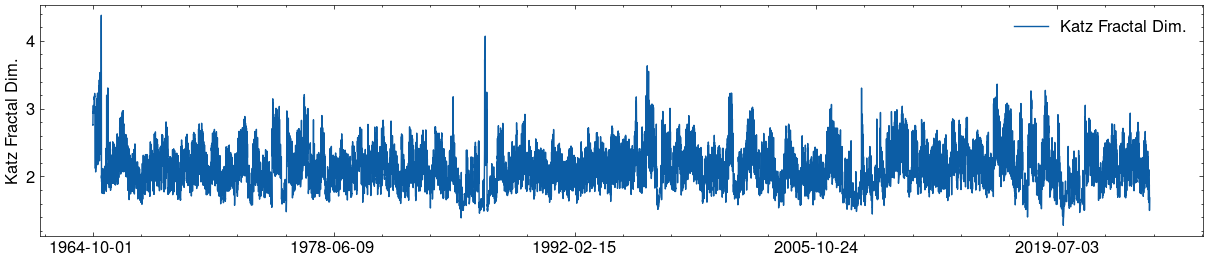

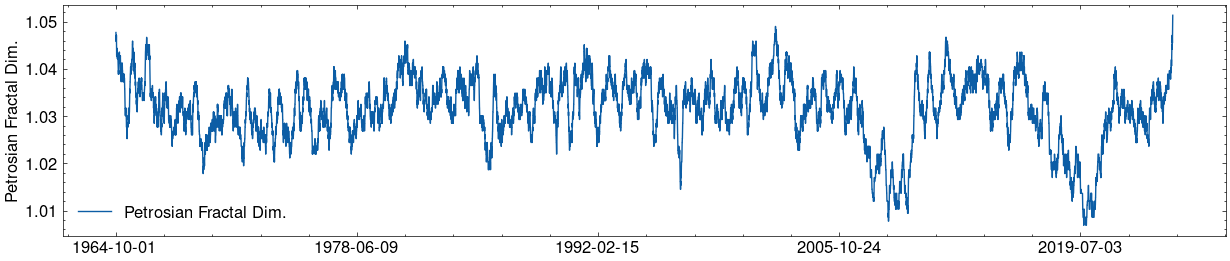

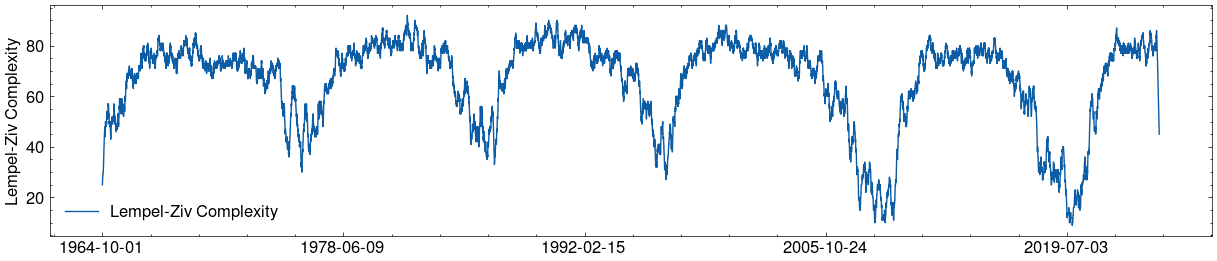

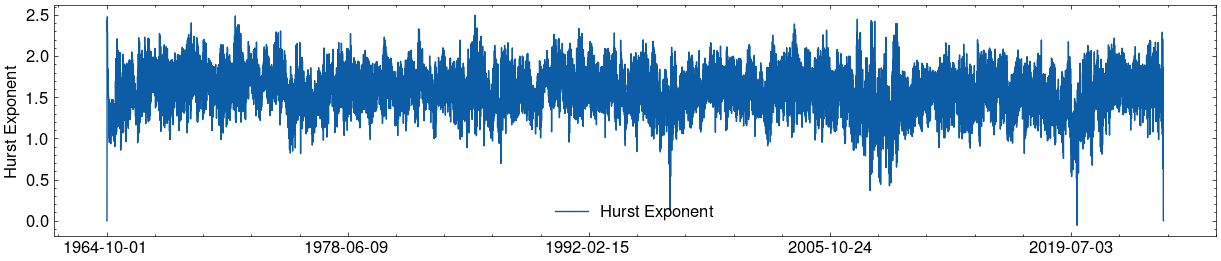

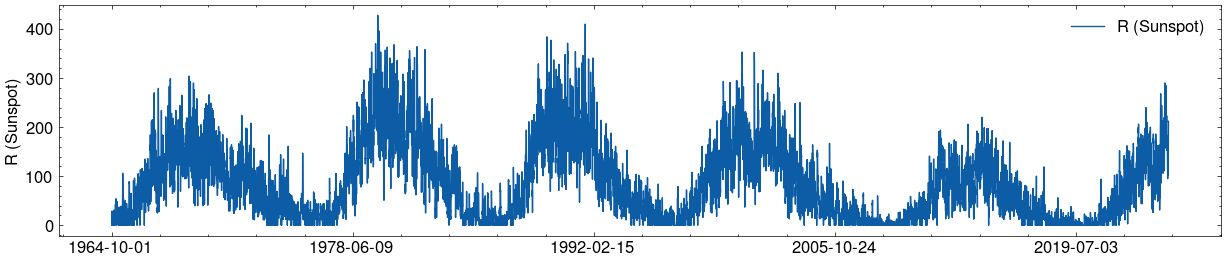

In [14]:
for i in features_df_R.columns:
    features_df_R[i].plot(figsize=(15,3),label=i)
    plt.ylabel(i);plt.legend()
    plt.show()

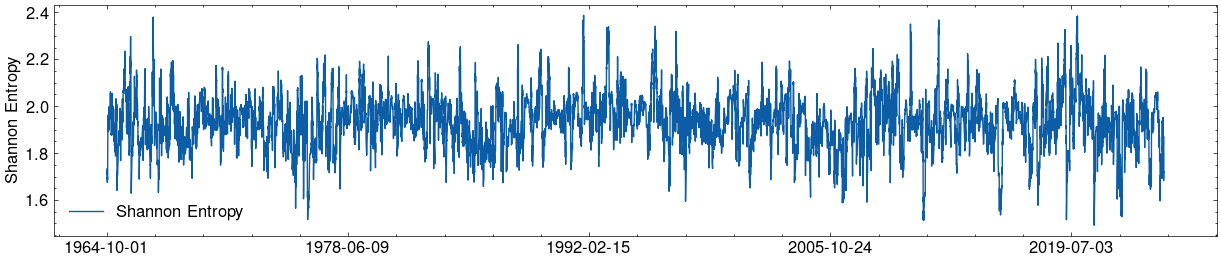

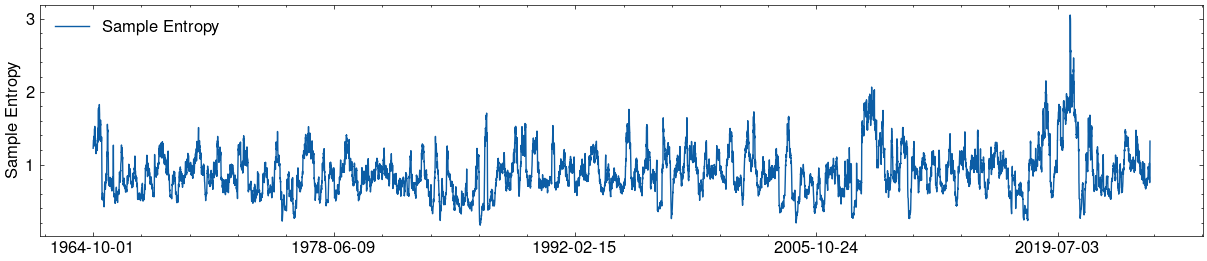

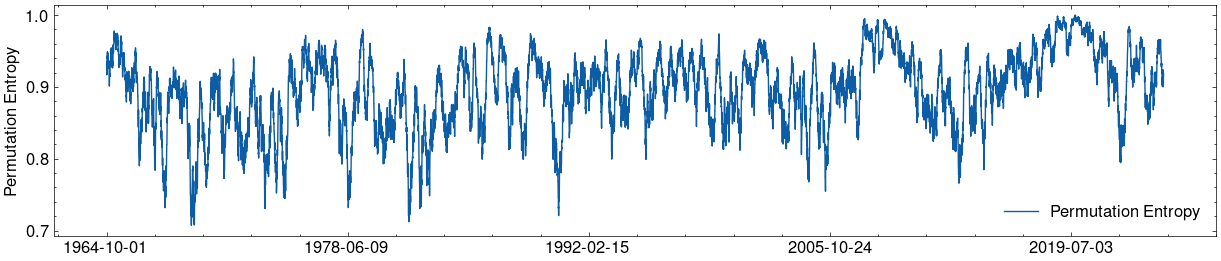

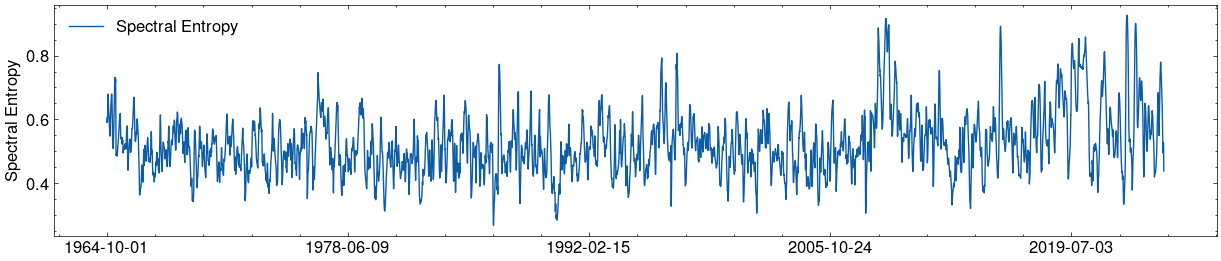

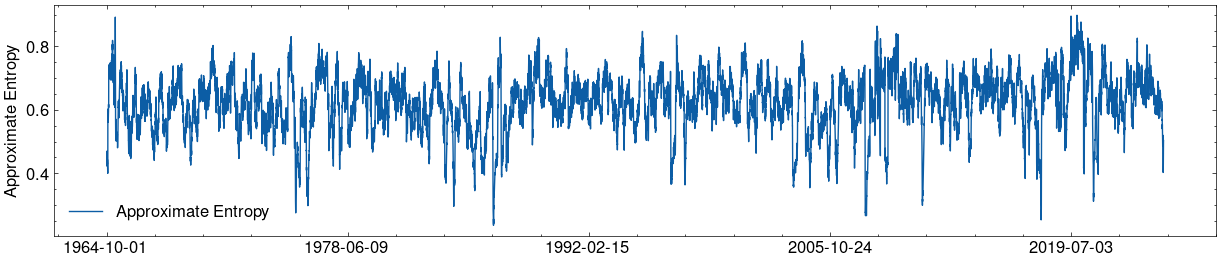

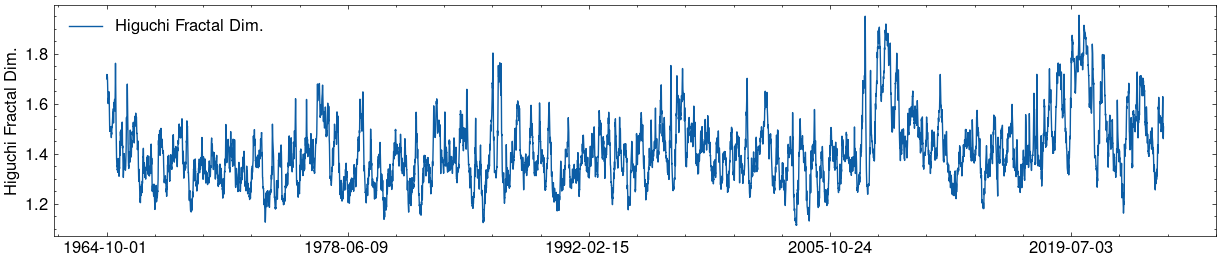

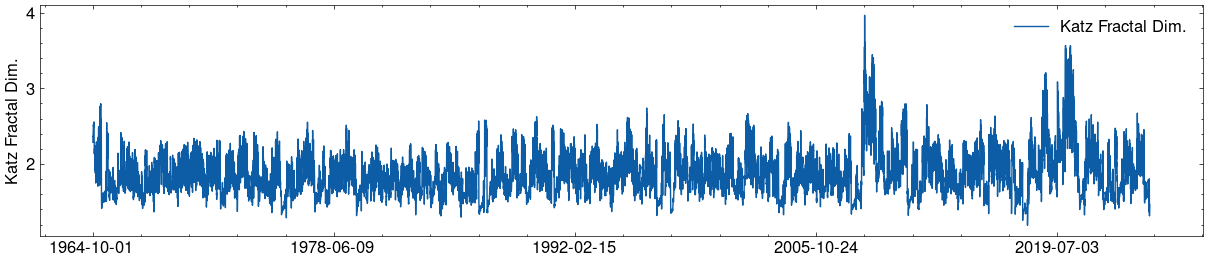

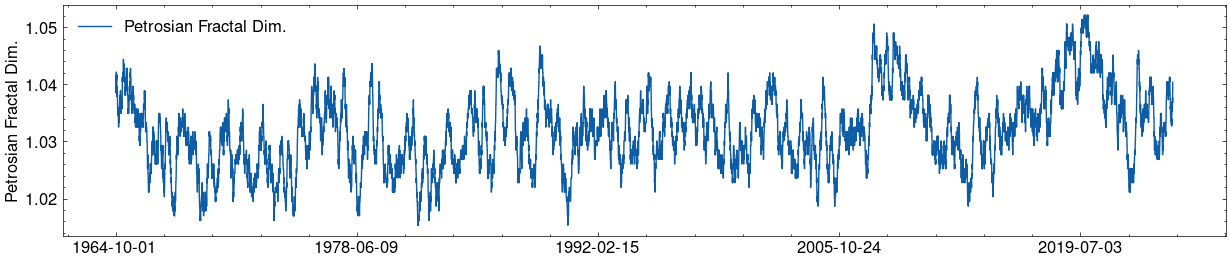

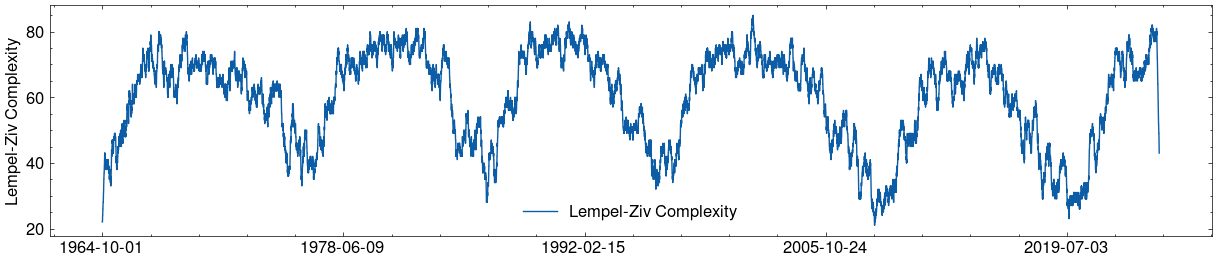

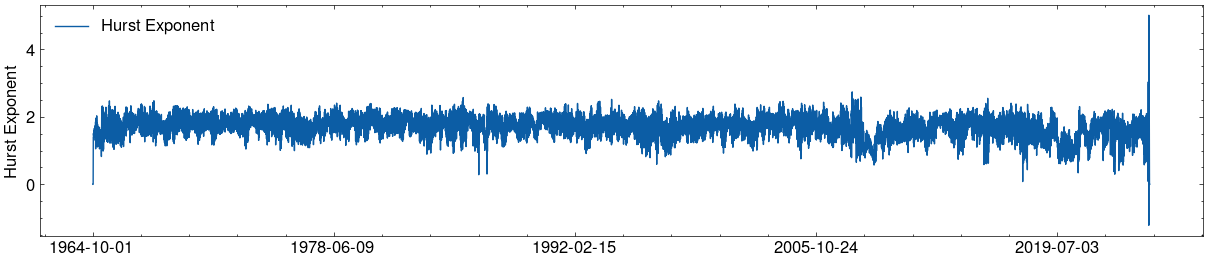

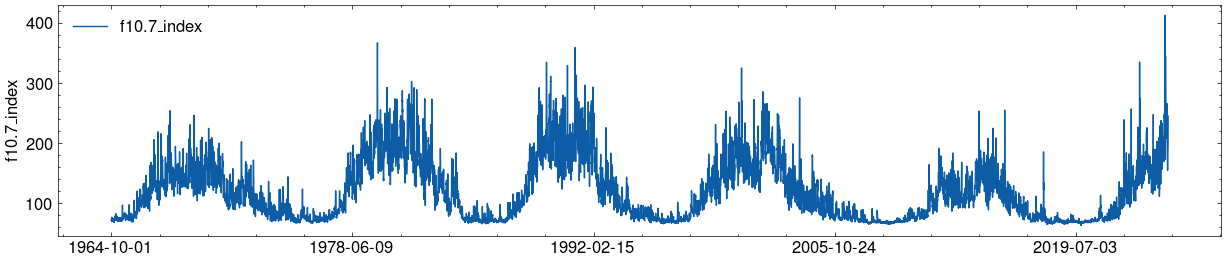

In [15]:
for i in features_df_F10.columns:
    features_df_F10[i].plot(figsize=(15,3),label=i)
    plt.ylabel(i);plt.legend()
    plt.show()

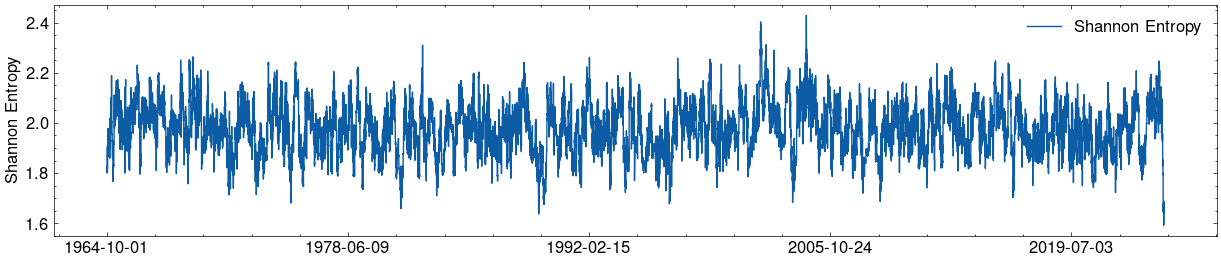

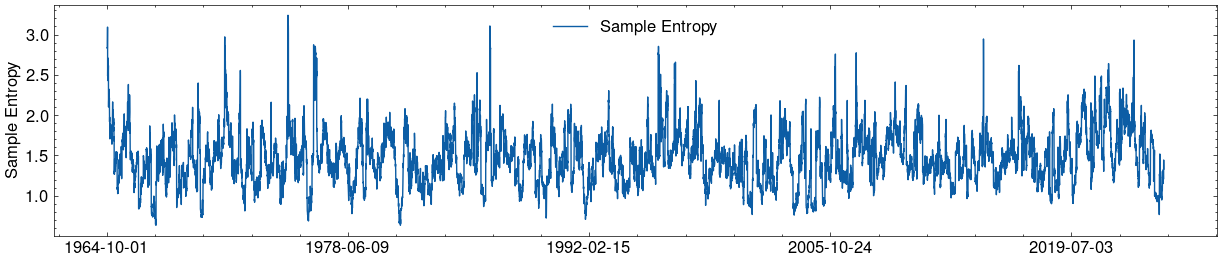

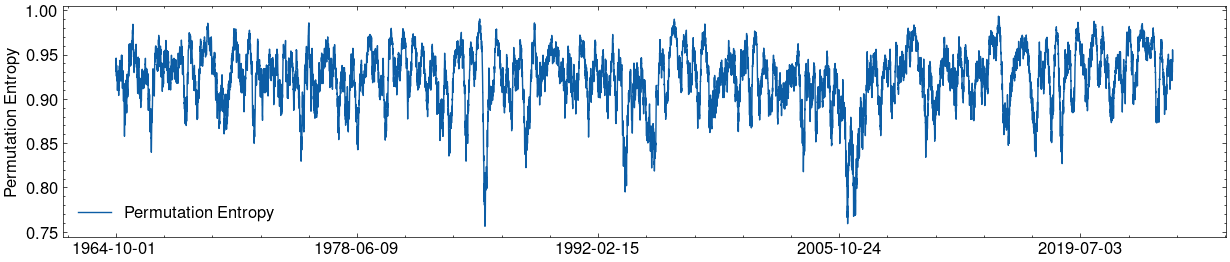

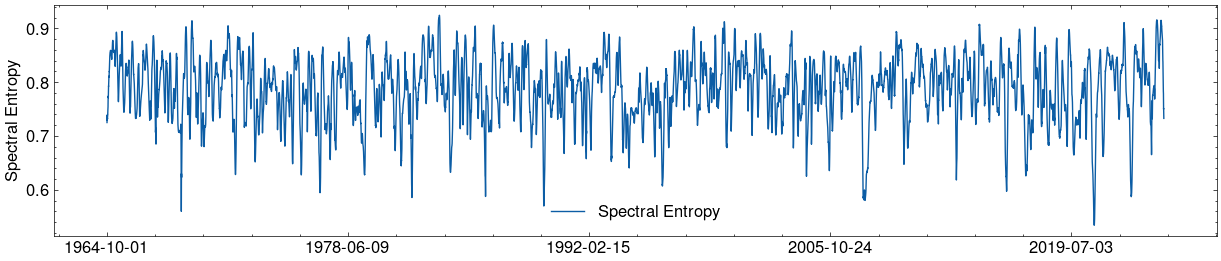

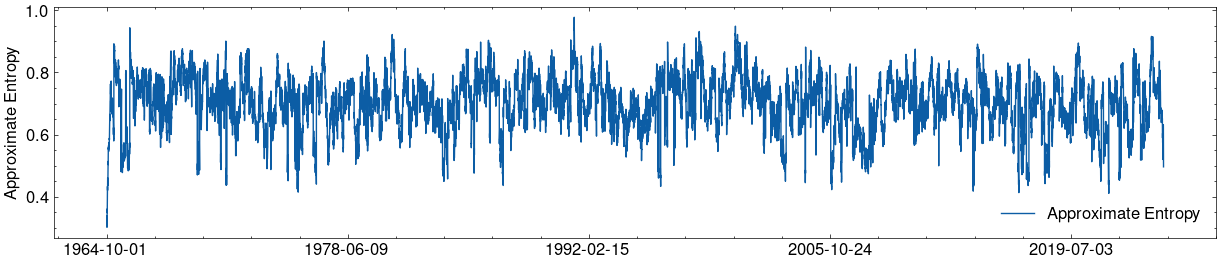

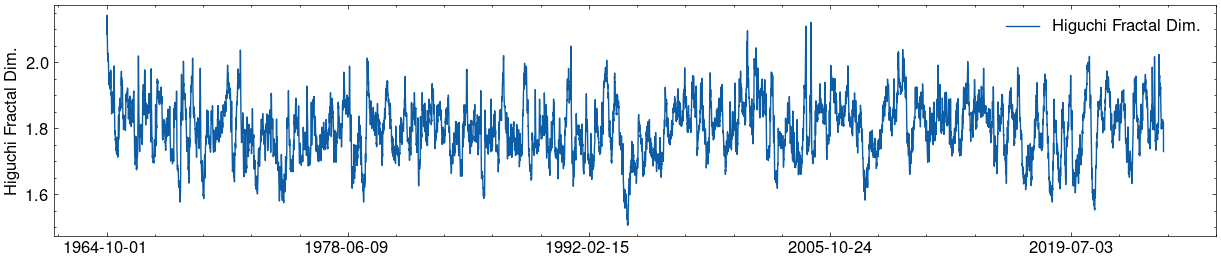

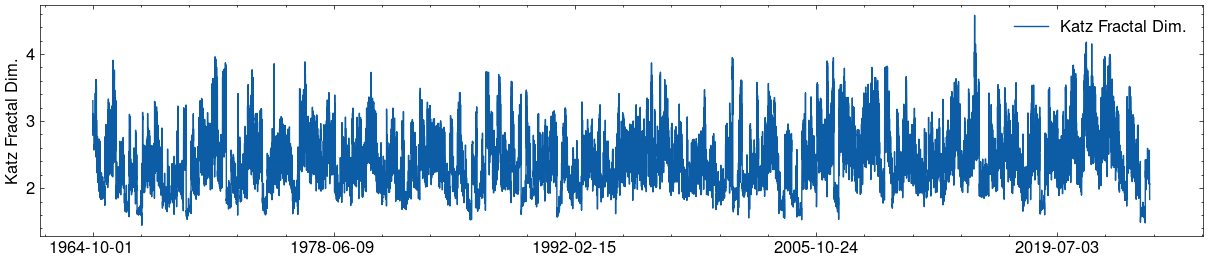

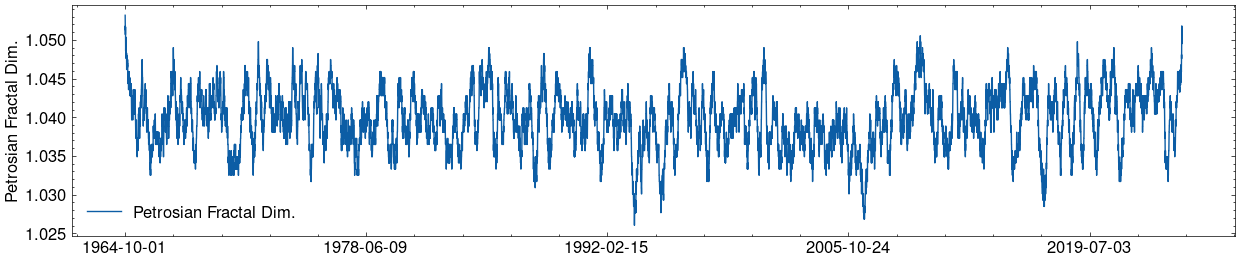

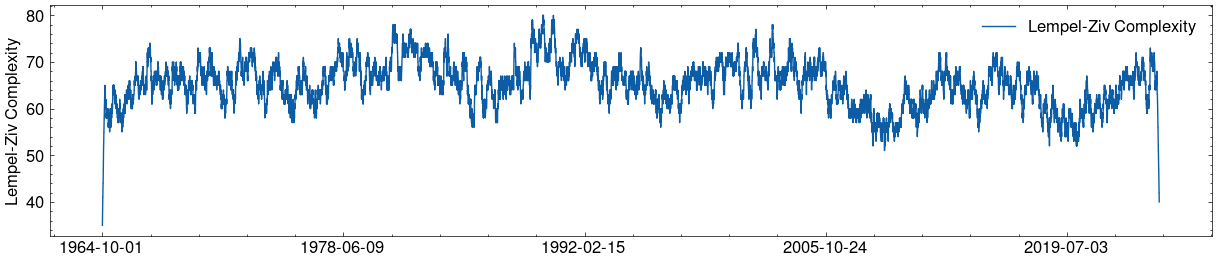

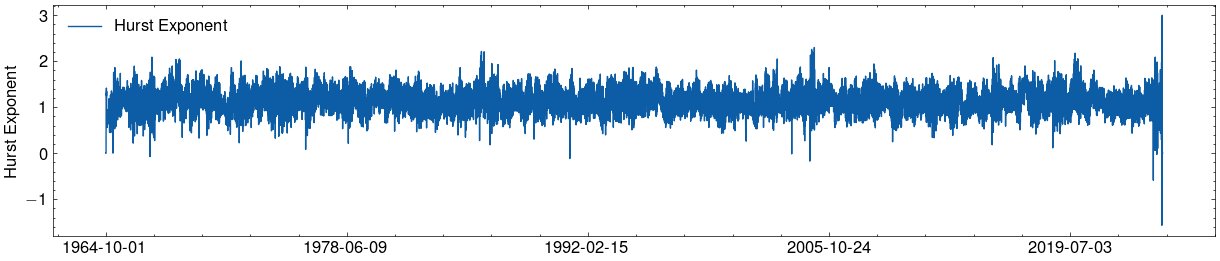

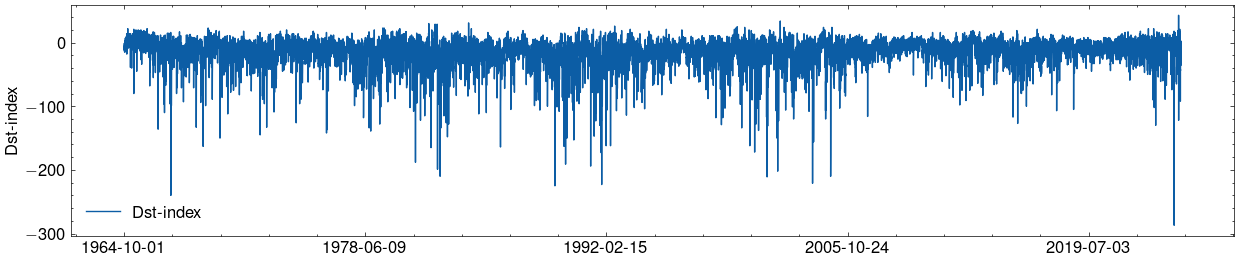

In [16]:
for i in features_df_Dst.columns:
    features_df_Dst[i].plot(figsize=(15,3),label=i)
    plt.ylabel(i);plt.legend()
    plt.show()

In [17]:
len(dataall), len(features_df_R)

(21918, 21918)

In [18]:
features_df_R_2=features_df_R.copy()
features_df_Dst_2=features_df_Dst.copy()
features_df_F10_2=features_df_F10.copy()

In [19]:
for i in dataall.columns[:-5]:
    features_df_R_2[i]=dataall[i]
    features_df_Dst_2[i]=dataall[i]
    features_df_F10_2[i]=dataall[i]

In [21]:
features_df_R_2.to_csv("datas/dataforR_all.csv",index=True)
features_df_Dst_2.to_csv("datas/dataforDst_all.csv",index=True)
features_df_F10_2.to_csv("datas/dataforF10_all.csv",index=True)